<a href="https://colab.research.google.com/github/shfarhaan/Fellowship.ai-CV-Challenge/blob/main/Fellowship_ai_Computer_Vision_(CV)_Challenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Use a pre-trained ResNet 50 and train on the Flowers dataset**

In [1]:
# !pip install tensorflow
# !pip install pillow

## **Importing necessary libraries and modules**

In [2]:
# Matplotlib is used for creating plots and visualizations.
import matplotlib.pyplot as plt

# NumPy is used for numerical operations and data manipulation.
import numpy as np

# Pillow Library: PIL (Python Imaging Library) provides image processing capabilities.
import PIL

# Importing the Image module from PIL to work with images.
from PIL import Image

# TensorFlow is a popular machine learning library.
import tensorflow as tf

# Keras is an API that sits on top of TensorFlow for building and training neural networks.
from tensorflow import keras

# Importing specific layers and optimizers from Keras.
from keras.layers import Dense
from keras.layers import Input, Flatten
from keras.models import Sequential
from keras.optimizers import Adam


## **Importing the Flowers dataset for the problem**

In [3]:
# Importing the 'pathlib' module to work with file paths.
import pathlib

# Define the URL of the flowers dataset to download.
flowers_dataset = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"

# Download and extract the dataset using TensorFlow's 'get_file' function.
# 'get_file' downloads a file from a URL and caches it locally.
# It also supports extracting tar.gz files if 'untar' is set to 'True'.
directory = tf.keras.utils.get_file('flower_photos',
                                    origin=flowers_dataset,
                                    untar=True)

# Create a Path object for the downloaded dataset directory.
data_directory = pathlib.Path(directory)

228813984/228813984 [==============================] - 11s 0us/step


Here,

- `tf.keras.utils.get_file` is used to download the dataset from the specified URL (`flowers_dataset`). The `origin` parameter specifies the URL, and `untar=True` indicates that the downloaded file is a tar.gz archive and should be extracted.

- `pathlib.Path(directory)` creates a `Path` object for the downloaded dataset directory. `pathlib` allows us to work with file paths in a platform-independent way.

Now that we have downloaded the flower photos dataset, we will store it locally for further processing.

In [4]:
# Prints the directory in which the dataset has been stored
print(data_directory)

/root/.keras/datasets/flower_photos


/root/.keras/datasets/flower_photos/sunflowers/7820305664_82148f3bfb_n.jpg


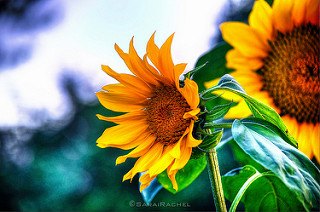

In [5]:
# Create a list of file paths to all the images in the 'sunflowers' subdirectory of the 'data_directory'.
sunflowers = list(data_directory.glob('sunflowers/*'))

# Print the path of the first image in the 'sunflowers' list.
print(sunflowers[0])

# Open and display the first image in the 'sunflowers' list using the PIL (Python Imaging Library) module.
# The 'str(sunflowers[0])' converts the Path object to a string representing the file path.
PIL.Image.open(str(sunflowers[0]))


Here,

- `list(data_directory.glob('sunflowers/*'))` generates a list of file paths to all the images in the 'sunflowers' subdirectory of the downloaded dataset. It uses the `glob` method from the `pathlib` module to find files matching the specified pattern ('sunflowers/*').

- `print(sunflowers[0])` prints the path of the first image in the 'sunflowers' category. The index `[0]` is used to access the first element in the `sunflowers` list.

- `PIL.Image.open(str(sunflowers[0]))` opens and displays the first image in the 'sunflowers' category using the PIL (Python Imaging Library) module. The `str(sunflowers[0])` converts the Path object to a string representing the file path, which is then used to open the image.

## **Partition and Visualize Data**

The dataset needs to be split into two parts:
1. for training and
2. for validation.

As each epoch passes, the model gets trained on the training subset. Then, it assesses its performance and accuracy on the validation subset simultaneously.

### **Creating the Training subset**

In [6]:
# Set the desired image height and width for preprocessing.
img_height, img_width = 180, 180

# Define the batch size for the training dataset.
batch_size = 32

# Create a training dataset using the images in the 'data_directory'.
# The dataset is created using TensorFlow's 'image_dataset_from_directory' function.
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_directory,  # Path to the dataset directory
    validation_split=0.25,  # Fraction of data to reserve for validation
    subset="training",  # Use this subset for training
    seed=100,  # Seed for shuffling the data for pseudo-randomness
    label_mode='categorical',  # Use categorical labels
    image_size=(img_height, img_width),  # Resize images to the specified dimensions
    batch_size=batch_size  # Set the batch size for the dataset
)


Found 3670 files belonging to 5 classes.
Using 2753 files for training.


Here,

- `img_height` and `img_width` are set to the desired dimensions `(180×180 size)` for image preprocessing. These dimensions will be used to resize the images in the dataset.

- `batch_size` is defined as 32, indicating that the dataset will be divided into batches, each containing 32 images and their corresponding labels.

- `tf.keras.preprocessing.image_dataset_from_directory` is used to create the training dataset from the images in `data_directory`. It performs several tasks:
  - It splits the data into a training subset (80% of the data) and a validation subset (20% of the data) based on the `validation_split` parameter.
  - It specifies `subset="training"` to indicate that this dataset is for training.
  - It uses a seed value (`seed`) for shuffling the data, ensuring pseudo-randomness.
  - The `label_mode` is set to 'categorical' to represent the labels as one-hot encoded categorical values.
  - `image_size` resizes the images to the specified dimensions.
  - `batch_size` sets the batch size for the dataset.

After running this code, we have a `train_ds` dataset ready for training machine learning models.

### **Creating the validation subset**

In [7]:
# Create a validation dataset using the images in the 'data_directory'.
# This dataset is intended for validation purposes.
validation_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_directory,  # Path to the dataset directory
    validation_split=0.25,  # Fraction of data to reserve for validation
    subset="validation",  # Use this subset for validation
    seed=100,  # Seed for shuffling the data for pseudo-randomness
    label_mode='categorical',  # Use categorical labels
    image_size=(img_height, img_width),  # Resize images to the specified dimensions
    batch_size=batch_size  # Set the batch size for the dataset
)


Found 3670 files belonging to 5 classes.
Using 917 files for validation.


## **Checking the Classes present in the dataset**

In [8]:
# Get the class names from the training dataset.
class_names = train_ds.class_names

# Print the class names.
print(class_names)


['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']


### **Visualizing nine (9) random images from the dataset:**

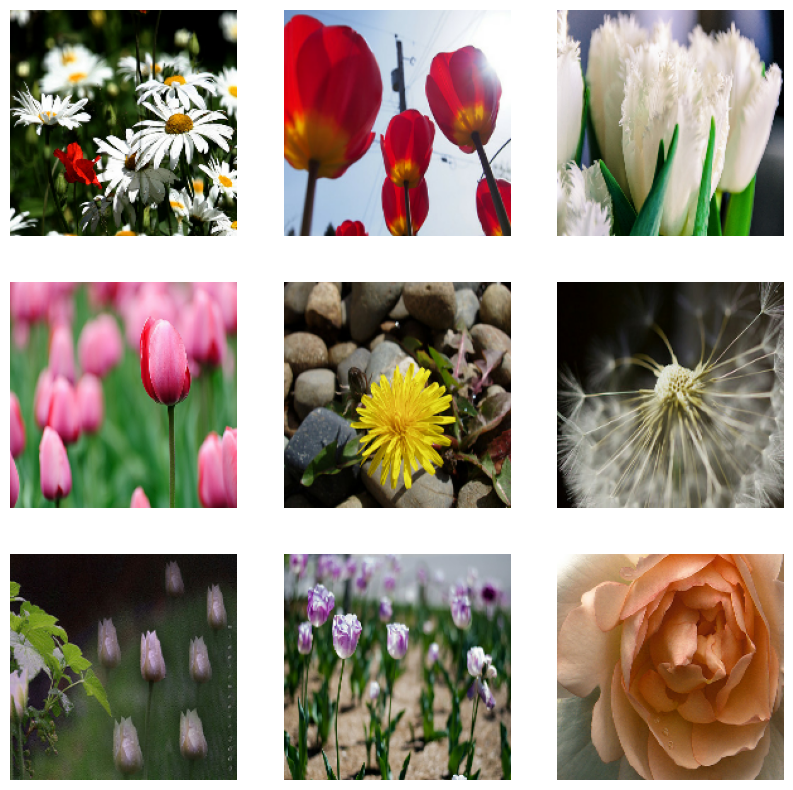

In [9]:
# Create a new figure for displaying images with a specified size.
plt.figure(figsize=(10, 10))

# Iterate through the first batch (take(1)) of images and labels in the training dataset.
for images, labels in train_ds.take(1):

    # Iterate through the first 9 images in the batch.
    for var in range(9):
        # Create a subplot in a 3x3 grid.
        ax = plt.subplot(3, 3, var + 1)

        # Display the image using Matplotlib after converting it to a NumPy array and uint8 data type.
        plt.imshow(images[var].numpy().astype("uint8"))

        # Turn off axis labels and ticks for cleaner visualization.
        plt.axis("off")


- The above code uses Matplotlib to create a 3x3 grid of subplots within a larger figure (10x10 inches) for displaying images.
- It then iterates through the first batch of images and labels in the training dataset (`train_ds.take(1)`) and displays the first 9 images in the grid.
- Each image is converted to a NumPy array and displayed as a uint8 (unsigned 8-bit integer) image, and axis labels and ticks are turned off for a cleaner visualization.

This helps us to visualize a subset of the training data, such that we get a sense of what the images look like.

## **Now we import the pre-trained ResNet 50 model:**

### **Import the Pre-trained Model**


The keras library comes with many cutting-edge machine learning algorithms that we can choose to solve a various problems.According to our problem, we select the ResNet-50 model to use transfer learning and create a classifier.


In [10]:
# Create an empty Sequential model to build the ResNet-based model.
resnet_model = Sequential()

# Load a pretrained ResNet-50 model from Keras applications.
pretrained_model = tf.keras.applications.ResNet50(
    include_top=False,  # Exclude the final classification layer
    input_shape=(180, 180, 3),  # Specify input image shape
    pooling='avg',  # Use global average pooling for feature extraction
    classes=5,  # Number of output classes
    weights='imagenet'  # Initialize with weights pre-trained on ImageNet
)

# Freeze all layers in the pretrained ResNet-50 model to prevent training.
for each_layer in pretrained_model.layers:
    each_layer.trainable = False

# Add the pretrained ResNet-50 model to the new Sequential model (resnet_model).
resnet_model.add(pretrained_model)

94765736/94765736 [==============================] - 5s 0us/step


Here,

- An empty Sequential model named `resnet_model` is created. This model will be used to build our custom neural network architecture.

- `tf.keras.applications.ResNet50` is used to load a pretrained ResNet-50 model. Key parameters are:
  - `include_top=False`: Excludes the final classification layer because we intend to add our own classification layers.
  - `input_shape=(180, 180, 3)`: Specifies the input image shape with a height and width of 180 pixels and 3 color channels (RGB).
  - `pooling='avg'`: Uses global average pooling to summarize the feature maps before the classification layers.
  - `classes=5`: Sets the number of output classes (as per our dataset).

- The code iterates through all layers in the pretrained ResNet-50 model and sets `each_layer.trainable = False` to freeze all the layers. This means that these layers will not be trained further, and their weights will remain fixed during our training.

- Finally, the pretrained ResNet-50 model is added to the `resnet_model` Sequential model, forming the feature extraction base of our custom model.

Setting `include_top` to `False` means it will allow adding input and output layers custom to a problem. The weights parameter specifies that the model uses its weights while training on the imagenet dataset.

The for loop on the model’s layers ensures it doesn’t learn its weights again and saves on time and space.

### **Next we add a fully connected output layer to the model where the learning can be initiated**

In [11]:
# Adding a Flatten layer to the resnet_model to convert
# the 2D feature maps to a 1D vector.
resnet_model.add(Flatten())

# Adding a Dense (fully connected) layer with 512 units and ReLU activation.
resnet_model.add(Dense(512, activation='relu'))

# Adding the final Dense layer with 5 units (for 5 output classes)
# and softmax activation for classification.
resnet_model.add(Dense(5, activation='softmax'))

Here, we are extending the `resnet_model` Sequential model with three additional layers:

1. **Flatten Layer**: The `Flatten` layer is used to flatten the 2D feature maps from the previous layers into a 1D vector. This is necessary before passing the data to fully connected layers.

2. **Dense Layer (512 Units, ReLU Activation)**: The first `Dense` layer adds 512 units with ReLU (Rectified Linear Unit) activation. This layer is responsible for learning complex patterns in the flattened feature vectors.

3. **Dense Layer (5 Units, Softmax Activation)**: The final `Dense` layer adds 5 units or neurons, which corresponds to the number of output classes i.e. the five flower classes in the dataset. The `softmax activation` function is used here to convert the network's outputs into class probabilities, making it suitable for multi-class classification.

These additional layers complete the neural network architecture for our specific classification task, with feature extraction performed by the pretrained ResNet-50 base and subsequent classification performed by the added fully connected layers.

## **Model Summary**

In [12]:
# Provide a summary of the architecture of our neural network
resnet_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 2048)              23587712  
                                                                 
 flatten (Flatten)           (None, 2048)              0         
                                                                 
 dense (Dense)               (None, 512)               1049088   
                                                                 
 dense_1 (Dense)             (None, 5)                 2565      
                                                                 
Total params: 24639365 (93.99 MB)
Trainable params: 1051653 (4.01 MB)
Non-trainable params: 23587712 (89.98 MB)
_________________________________________________________________



Here's an explanation of the information provided in the summary:

- `Model`: Indicates the name of the model, which is "sequential" in this case.

- `Layer (type)`: Lists the layers in the model, including their types.

- `Output Shape`: Shows the shape of the output produced by each layer. For example, `(None, 2048)` means that the output shape is a 2D tensor with 2048 elements in the second dimension. The `None` in the first dimension represents the batch size, which is variable and not fixed during model compilation.

- `Param #`: Displays the number of trainable parameters in each layer. This includes the weights and biases that the network learns during training.

- `Total params`: Summarizes the total number of trainable parameters in the entire model.

- `Trainable params`: Indicates the number of parameters that can be trained (typically, these are the weights and biases in the fully connected layers, as the ResNet-50 layers were set to non-trainable in our code).

- `Non-trainable params`: Shows the number of parameters that are not trainable (typically, these are the parameters in the frozen ResNet-50 layers).

This summary is helpful for understanding the architecture of the neural network and verifying that the expected number of parameters is present.

## **Train and Evaluate Model**

### **To train the ResNet-50 model:**

In [13]:
# Compile the model with specified optimizer, loss function, and metrics.
resnet_model.compile(
    optimizer=Adam(learning_rate=0.001),  # Optimizer with a learning rate of 0.001
    loss='categorical_crossentropy',  # Categorical cross-entropy loss for multi-class classification
    metrics=['accuracy']  # Monitor accuracy during training
)

# Define the number of training epochs.
epochs = 10

# Train the model on the training dataset while validating on the validation dataset.
history = resnet_model.fit(
    train_ds,  # Training dataset
    validation_data=validation_ds,  # Validation dataset
    epochs=epochs  # Number of training epochs
)

Epoch 1/10
87/87 [==============================] - 25s 136ms/step - loss: 0.7557 - accuracy: 0.7733 - val_loss: 0.5608 - val_accuracy: 0.8081
Epoch 2/10
87/87 [==============================] - 9s 101ms/step - loss: 0.2957 - accuracy: 0.8932 - val_loss: 0.4498 - val_accuracy: 0.8277
Epoch 3/10
87/87 [==============================] - 9s 100ms/step - loss: 0.1808 - accuracy: 0.9372 - val_loss: 0.4424 - val_accuracy: 0.8462
Epoch 4/10
87/87 [==============================] - 8s 93ms/step - loss: 0.1069 - accuracy: 0.9637 - val_loss: 0.3774 - val_accuracy: 0.8757
Epoch 5/10
87/87 [==============================] - 9s 102ms/step - loss: 0.0693 - accuracy: 0.9789 - val_loss: 0.4525 - val_accuracy: 0.8637
Epoch 6/10
87/87 [==============================] - 9s 99ms/step - loss: 0.0617 - accuracy: 0.9797 - val_loss: 0.4212 - val_accuracy: 0.8844
Epoch 7/10
87/87 [==============================] - 8s 93ms/step - loss: 0.0254 - accuracy: 0.9960 - val_loss: 0.4283 - val_accuracy: 0.8735
Epoch 8/

Here,

- `resnet_model.compile` configures the training process of the model. It specifies the optimizer, which is Adam with a learning rate of 0.001, the loss function, which is categorical cross-entropy (suitable for multi-class classification tasks), and the metric to monitor during training, which is accuracy.

- `epochs` is set to 10, indicating the number of times the model will iterate through the entire training dataset.

- `resnet_model.fit` starts the training process. It trains the model on the `train_ds` dataset and validates its performance on the `validation_ds` dataset for the specified number of epochs. The training progress is stored in the `history` variable, which can be used to visualize training and validation metrics over time.

This code trains the model using the specified optimizer and loss function, aiming to minimize the loss and maximize accuracy over the training epochs. The `history` object allows us to analyze the training and validation performance of the model and make adjustments as needed.

### **To evaluate the ResNet-50 model after training the model:**

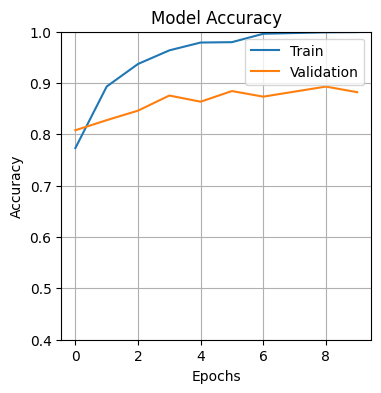

In [14]:
# Create a new figure for plotting with a specified size.
plt.figure(figsize=(4, 4))

# Define the range of epochs for the x-axis.
epochs_range = range(epochs)

# Plot the training accuracy and validation accuracy over epochs.
plt.plot(history.history['accuracy'], label="Training Accuracy")
plt.plot(history.history['val_accuracy'], label="Validation Accuracy")

# Set the y-axis limits to ensure a proper view of the accuracy values.
plt.axis(ymin=0.4, ymax=1)

# Add a grid to the plot for better readability.
plt.grid()

# Set the title and labels for the plot.
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')

# Add a legend to the plot indicating the training and validation lines.
plt.legend(['Train', 'Validation'])

# Display the plot.
plt.show()

# Optionally, we can save the plot as an image file (if we uncomment the line below).
# plt.savefig('output-plot.png')


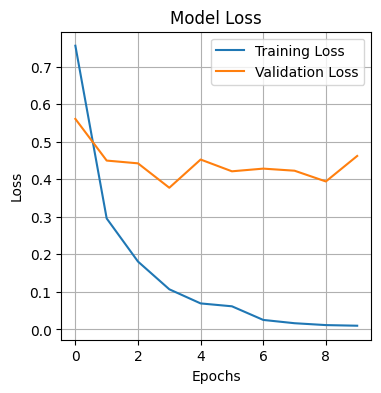

In [15]:
# Create a new figure for plotting with a specified size.
plt.figure(figsize=(4, 4))

# Plot the training loss and validation loss over the specified range of epochs.
plt.plot(epochs_range, history.history['loss'], label="Loss")
plt.plot(epochs_range, history.history['val_loss'], label="Validation Loss")

# Add a grid to the plot for better readability.
plt.grid()

# Set the title and labels for the plot.
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')

# Add a legend to the plot indicating the training and validation loss lines.
plt.legend(['Training Loss', 'Validation Loss'])

# Display the plot.
plt.show()


Here:

- The `epochs_range` variable is defined to represent the range of epochs on the x-axis.

- `plt.plot` is used to plot the training accuracy and validation accuracy over the specified epochs.

- `plt.axis` is used to set the y-axis limits to ensure that the accuracy values are within the specified range.

- `plt.grid` adds a grid to the plot for better visualization.

- Title, labels, and a legend are added to the plot to provide context and make it more informative.

- `plt.show()` is used to display the plot.



## **Model Inference**

Before running the model on the dataset, the images must go through preprocessing steps. These steps ensure that each image’s dimensions correspond to what the model trained on.

### **To run the predictions on a sample image of a rose from the dataset:**

In [16]:
# pip install opencv-python

In [17]:
# Import the OpenCV library as cv2.
import cv2

# Load an image from the file path of the first image in the 'sunflowers' list.
image = cv2.imread(str(sunflowers[0]))

# Resize the loaded image to the specified dimensions (img_height, img_width).
image_resized = cv2.resize(image, (img_height, img_width))

# Expand the dimensions of the resized image to match
# the expected input shape of the model.
# The `np.expand_dims` function adds an extra dimension
#   at the beginning (axis=0) to create a batch of one image.
image = np.expand_dims(image_resized, axis=0)

# Print the shape of the image tensor.
print(image.shape)


(1, 180, 180, 3)


Here:

- We import the OpenCV library as `cv2`, which is commonly used for image processing tasks.

- We load an image from the file path of the first image in the `sunflowers` list in our dataset using `cv2.imread`. This reads the image as a NumPy array.

- We resize the loaded image to the specified dimensions of `img_height` and `img_width` using `cv2.resize`. This step ensures that the image matches the expected input size of our neural network model.

- We use `np.expand_dims` to add an extra dimension at the beginning of the image array. This is done to create a batch of one image, which is the typical format expected by deep learning models. The resulting shape is `(1, img_height, img_width, 3)`.

    - `1` is the batch size, indicating that there is only one image in the batch.
    - `img_height` and `img_width` are the specified dimensions of the image.
    - `3` indicates that the image has three color channels (typically, Red, Green, and Blue, in that order).

- Finally, we print the shape of the image tensor to confirm its dimensions.



In [18]:
# Use the 'resnet_model' to make a prediction on the prepared image.
image_prediction = resnet_model.predict(image)

# Print the prediction results, which will be
# a probability distribution over the classes.
print(image_prediction)


1/1 [==============================] - 1s 959ms/step
[[3.8793255e-06 4.6716977e-07 1.4179100e-08 9.9999452e-01 1.2370924e-06]]


### **To produce a human-readable output label:**

In [19]:
# Calculate the predicted class index using 'np.argmax' on 'image_prediction'.
predicted_class_index = np.argmax(image_prediction)

# Use the predicted class index to look up the corresponding class name in 'class_names'.
image_output_class = class_names[predicted_class_index]

# Print the predicted class label.
print("The predicted class is", image_output_class)


The predicted class is sunflowers
